In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
x_train = x_train / 255
x_test = x_test / 255

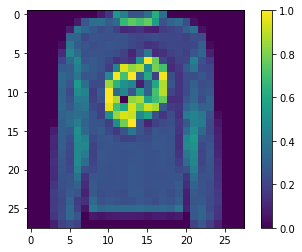

In [13]:
plt.figure()
plt.imshow(x_train[123])
plt.colorbar()
plt.grid(False)

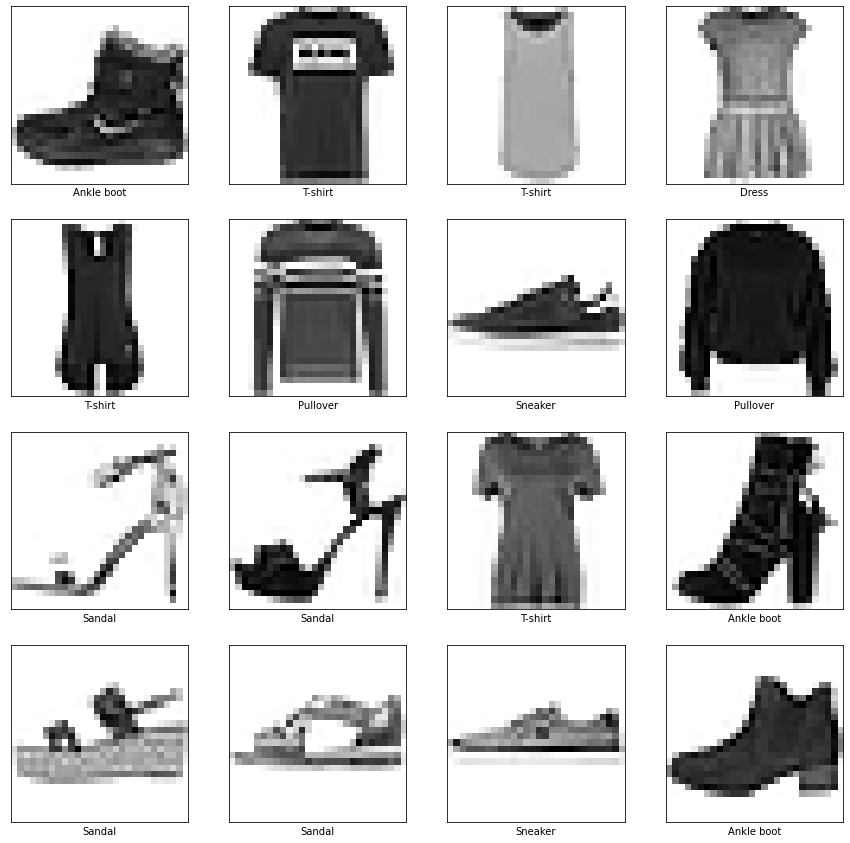

In [ ]:
plt.figure(figsize=(15,15))
for i in range (16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])

In [104]:
model = keras.Sequential(
    [
        Input(shape=(28,28,1)),
        keras.layers.Conv2D(32,3, activation = 'gelu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32,3, activation = 'gelu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Dropout(0.25),
        
        keras.layers.Conv2D(64,3, activation = 'gelu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64,3, activation = 'gelu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Dropout(0.25),
     
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='gelu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, 'softmax')
    ]
)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                     

In [105]:
model.fit(x_train, y_train, epochs=10)
print("Finish")

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4546 - accuracy: 0.8421
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3060 - accuracy: 0.8908
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2719 - accuracy: 0.9027
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2486 - accuracy: 0.9106
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2300 - accuracy: 0.9174
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2181 - accuracy: 0.9218
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2053 - accuracy: 0.9262
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1924 - accuracy: 0.9307
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1847 - accuracy: 0.9333
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [106]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1909 - accuracy: 0.9332


In [34]:
predict = model.predict(x_train)

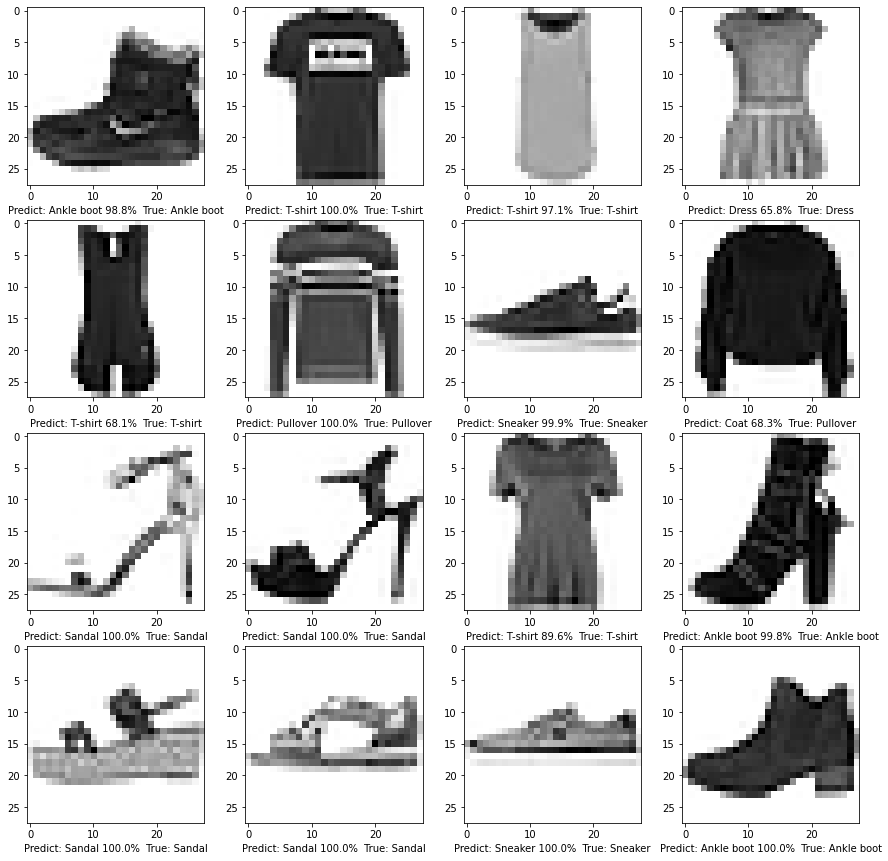

In [45]:
plt.figure(figsize=(15,15))
for i in range (16):
  plt.subplot(4,4, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(f"Predict: {classes[np.argmax(predict[i])]} {round(100 * np.max(predict[i]), 1)}%  True: {classes[y_train[i]]}")